# Matrices being similar

We will start with an example where the vector space **V = all polynomials of degree <=2.**

So $v_1=x-x^2\in V$, but $v_2=3-x^3\notin V$

This vector space has dimension 3. Its canonical basis $E=\{e_1=1, e_2=x, e_3=x^2\}$. 

We have a linear operation $\mathcal{D}$ that represents the derivative operator. 

For example, $\mathcal{D}(v_1)=1-2x$.

## The derivative operator has a matrix representation using $E$.

Let $v=(c_1,c_2,c_3)_E$, which means that $v=c_1e_1+c_2e_2+c_3e_3$

$\mathcal{D}(c_1e_1+c_2e_2+c_3e_3)=\mathcal{D}(c_1+c_2x+c_3x^2)=c_2+2c_3x=c_2e_1+2c_3e_2$

### If we agree to use $E$ to represent polynomials, then

$\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix}\xrightarrow{\mathcal D}\begin{bmatrix}c_2\\2c_3\\0\end{bmatrix}$, so we can write
$D_E = \begin{bmatrix}0&1&0\\0&0&2\\0&0&0\end{bmatrix}$

## The derivative operator has another matrix representation using $B$.

$B=\{v_1=1, v_2=x-1, v_3=x^2-1\}$

Let $v=(c_1,c_2,c_3)_B$, which means that $v=c_1v_1+c_2v_2+c_3v_3$

$\mathcal{D}(c_1v_1+c_2v_2+c_3v_3)=\mathcal{D}(c_1-c_2-c_3+c_2x+c_3x^2)=c_2+2c_3x=(c_2+2c_3)v_1+2c_3v_2$

### If we agree to use $B$ to represent polynomials, then

$\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix}\xrightarrow{\mathcal D}\begin{bmatrix}c_2+2c_3\\2c_3\\0\end{bmatrix}$, so we can write
$D_B = \begin{bmatrix}0&1&2\\0&0&2\\0&0&0\end{bmatrix}$

##  Matrices that represent the same operator under different bases are called similar.

It can be shown that $PD_BP^{-1}=D_E$, where $[v_1,v_2,v_3]=[e_1,e_2,e_3]P$

Proof:

$v=Ec=[e_1,e_2,e_3]\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix}=[v_1,v_2,v_3]P^{-1}\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix}$.

It means that $P^{-1}c$ is the coefficients of $v$ in $B$.

So $D_BP^{-1}c$ is the output in the basis $B$. That is $\mathcal D(v)=[v_1,v_2,v_3]D_BP^{-1}c=[e_1,e_2,e_3]PD_BP^{-1}c$.

So $D_Ec=PD_BP^{-1}c$.

**See Textbook 8.5 for more details.**

## Definition: Two square matrices $A,B$ are called similar if $A=PBP^{-1}$ for some $P$.

## Definition: $A$ is diagonalizable if $A$ is similar to a diagonal matrix. 

**That is $A=P\Lambda P^{-1}$, where $\Lambda$ is diagonal.**

# (not so good) Compression using eigenvector/eigenvalue

## Load image

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
path = "./data/"

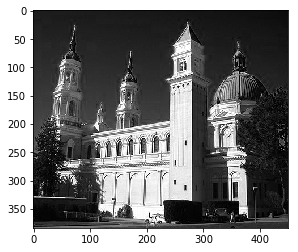

In [3]:
img = mpimg.imread(path+'church.jpg')
I = img[:,:,0]
plt.imshow(I, cmap = 'gray')

In [4]:
I.shape

(384, 450)

## Make the image symmetric??

In [5]:
I0 = np.zeros([450,450])
I0[:384,:] = I.astype(float)

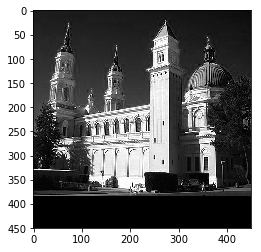

In [6]:
plt.imshow(I0, cmap = 'gray')

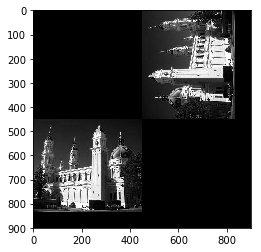

In [7]:
#pad more zeros to make it symmetric
Is = np.zeros([900,900])
Is[450:,:450] = I0
Is[:450,450:] = I0.T
plt.imshow(Is, cmap = 'gray')

In [8]:
np.allclose(Is,Is.T)

True

## Orthogonally diagonalizing the symmetric matrix

In [10]:
?np.linalg.eigh

In [11]:
e,Q = np.linalg.eigh(Is)

In [12]:
e.shape

(900,)

In [13]:
np.allclose(Q@Q.T, np.identity(900))

True

In [14]:
np.allclose(Is,  Q@np.diag(e)@Q.T)

True

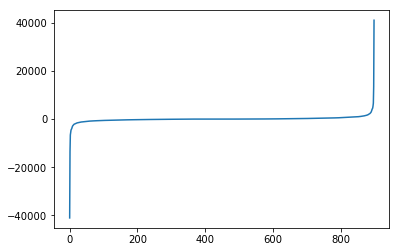

In [15]:
plt.plot(np.arange(900),e)
plt.show()

## Discard the portion with tiny eigenvalues.

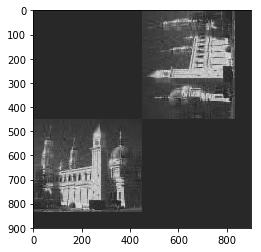

In [20]:
re = np.copy(e)
r = 50
si = int(r/2)
ei = int(900-r/2)
re[si:ei]=0   # Set the middle eigenvalues equal to 0
plt.imshow(Q@np.diag(re)@Q.T, cmap = 'gray')

In [21]:
(50*900+50)/(384*450)

0.26070601851851855

This can be improved using SVD.

# The Power method

on computing the eigenvector that corresponds to the largest eigenvalue (in magnitude).

### $\lim_{n\rightarrow\infty}A^nx$ will be the ''biggest'' eigenvector.

A common algorithm:

$\displaystyle x_1=\frac{Ax_0}{\|Ax_0\|}, x_2=\frac{Ax_1}{\|Ax_1\|},..., x_k = \frac{Ax_{k-1}}{\|Ax_{k-1}\|},...$

See 11(c) of HW4. For more detail see Section 9.2.

# Page Rank algorithm (Section 10.20 of textbook)

A paper that goes with this algorithm: https://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf

## The problem

<img src="./fig/graph1.jpg" style="width: 300px;">

This is a directed graph. The 6 nodes represents 6 pages. An outgoing arrow from 1 to 3 means that there is a link to page 3 on page 1.

In [22]:
import numpy as np
A = np.array([[0,1,0,0,1,1],[0, 0,1,0,1,0],[1,0,0,1,0,1],[0,1,0,0,0,1],[0,1,1,0,0,0],[0,0,1,1,1,0]])
print('This is the adjecency matrix')
print(A)
print('Column 2 means the links on Page 2.')

This is the adjecency matrix
[[0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 0 1]
 [0 1 1 0 0 0]
 [0 0 1 1 1 0]]
Column 2 means the links on Page 2.


## Method 1: Simulated clicking

We assume that we start on page 2, and we have equal chance to click on 1, 4, or 5. After we land on one of the 3 pages, we again assume there is equal probability for us to go to next page...

In [23]:
def Sim_visit(N):
    # N = how many times to click
    # will return the total number that each page has been visited.
    PageVisit = np.array([0,1,0,0,0,0]) #store the number of visits of each page
     
    page = 1
    for i in range(N):
        Idx = np.where(A[:,page]==1)[0]
        page = Idx[np.random.randint(len(Idx))]  #randomly go to this page
        PageVisit[page] += 1
    return PageVisit

In [27]:
print(Sim_visit(100000))

[15503 13620 27217 10947 13685 19029]


In [28]:
import pandas as pd
columns = [0,10,100, 1000,10000,20000]
index = range(1,7,1)  #page numbering
Clickdf = pd.DataFrame(index=index, columns=columns)
for i in range(len(columns)):
    clicks = Sim_visit(columns[i])
    Clickdf[columns[i]] = clicks
Clickdf

,0,10,100,1000,10000,20000
1,0,1,16,159,1467,3023
2,1,3,17,148,1358,2760
3,0,3,28,271,2721,5477
4,0,2,9,99,1151,2228
5,0,1,14,145,1354,2727
6,0,1,17,179,1950,3786


In [29]:
# transform to ratio
Ratiodf = Clickdf/[1,11,101,1001,10001,20001]
Ratiodf

,0,10,100,1000,10000,20000
1,0.0,0.090909,0.158416,0.158841,0.146685,0.151142
2,1.0,0.272727,0.168317,0.147852,0.135786,0.137993
3,0.0,0.272727,0.277228,0.270729,0.272073,0.273836
4,0.0,0.181818,0.089109,0.098901,0.115088,0.111394
5,0.0,0.090909,0.138614,0.144855,0.135386,0.136343
6,0.0,0.090909,0.168317,0.178821,0.194981,0.189291


## Method 2: Using eigenvector 

It turns out that we do not need the Monte Carlo method to find out this ratio. The ratio (or score vector) converges to the eigenvector of?

In [30]:
def ColN(A): #normalize each column such that each column sums up to 1
    n = A.shape[0]
    Colsum = np.sum(A,axis=0)
    return A/np.outer(np.ones(n),Colsum)

In [31]:
np.set_printoptions(suppress=True)
%precision 2
B = ColN(A)
print('"normalize" each column of the adjacency matrix')
print(B)

"normalize" each column of the adjacency matrix
[[ 0.    0.33  0.    0.    0.33  0.33]
 [ 0.    0.    0.33  0.    0.33  0.  ]
 [ 1.    0.    0.    0.5   0.    0.33]
 [ 0.    0.33  0.    0.    0.    0.33]
 [ 0.    0.33  0.33  0.    0.    0.  ]
 [ 0.    0.    0.33  0.5   0.33  0.  ]]


### Now $Bx$ has a meaning

$$x^{(1)}=Bx^{(0)}=\begin{bmatrix}
0&1/3&0  &0&1/3&1/3\\
0&0  &1/3&0&1/3&0\\
1&0  &0  &1/2&0&1/3\\
0&1/3&0  &0&0&1/3\\
0&1/3&1/3&0&0&0\\
0&0  &1/3&1/2&1/3&0
\end{bmatrix}\begin{bmatrix}
0\\ 1\\0\\0\\0\\0
\end{bmatrix}=\begin{bmatrix}
1/3\\ 0\\0\\1/3\\1/3\\0
\end{bmatrix},\qquad x^{(2)}=B^2x^{(0)}=Bx^{(1)}=\begin{bmatrix}
0&1/3&0  &0&1/3&1/3\\
0&0  &1/3&0&1/3&0\\
1&0  &0  &1/2&0&1/3\\
0&1/3&0  &0&0&1/3\\
0&1/3&1/3&0&0&0\\
0&0  &1/3&1/2&1/3&0
\end{bmatrix}\begin{bmatrix}
1/3\\ 0\\0\\1/3\\1/3\\0
\end{bmatrix}=\begin{bmatrix}
1/9\\ 1/9\\1/2\\0\\0\\5/18
\end{bmatrix}$$

### $B$ is a **probability transition matrix** or **stochastic matrix** (nonnegative entries, sums up to 1) of this Markov process. $x^{(0)}$ is the initial state vector.

In [32]:
def Anx(A,x0,n): #return A^n(x0)
    x = x0
    for i in range(n):
        x = A@x
    return x

In [34]:
score_v = Anx(B,np.array([0.5,0.5,0,0,0,0]),200)
%precision 6
print(score_v)

[ 0.154545  0.136364  0.272727  0.109091  0.136364  0.190909]


### Check using the eig function in Numpy

In [38]:
# check
e,P = np.linalg.eig(B)
%precision 5
print('eigenvalues are', e)
print ('eigenvector corresponding to 1 is', P[:,0]/sum(P[:,0]))

eigenvalues are [ 1.00000+0.j      -0.29773+0.55218j -0.29773-0.55218j  0.18422+0.j
 -0.25542+0.j      -0.33333+0.j     ]
eigenvector corresponding to 1 is [ 0.15455-0.j  0.13636-0.j  0.27273-0.j  0.10909-0.j  0.13636-0.j
  0.19091-0.j]


## A more complicated, but necessary model

### Slightly changed network

<img src="./fig/graph2.jpg" style="width: 400px;">

The cluster of Pages 1, 2, 3 has no outgoing links to the cluster of Pages 4, 5, 6, so once a surfer exits cluster 4,5,6, the surfer will be "trapped" in cluster 1,2,3 and the fractional page counts for pages 4,5,6 will approach zero, thereby assignning the pages in that cluster a page rank of 0.

In [39]:
A2 = np.array([[0,1,0,0,1,1],[0, 0,1,0,1,0],[1,1,0,1,0,1],[0,0,0,0,0,1],[0,0,0,0,0,0],[0,0,0,1,1,0]])
print (A2)

[[0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 1 0 1 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]]


In [40]:
B2 = ColN(A2)
print(B2)

[[ 0.       0.5      0.       0.       0.33333  0.33333]
 [ 0.       0.       1.       0.       0.33333  0.     ]
 [ 1.       0.5      0.       0.5      0.       0.33333]
 [ 0.       0.       0.       0.       0.       0.33333]
 [ 0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.5      0.33333  0.     ]]


In [41]:
print (Anx(B2,np.ones(6)/6,100))

[ 0.2  0.4  0.4  0.   0.   0. ]


### Solution: We assume that there is some chance for the surfer to go to a page that's not linked.

With probability $\delta$ the surfer chooses a linked page

With probability $1-\delta$ the surfer choose an linked/unlinked page. In this case, the surfer will choose any page at random with prob $\frac{1-\delta}{n}$. ($n$ is the number of total pages.)

Prob (pick i while on j) = $m_{ij} = \delta b_{ij}+\frac{1-\delta}{n}$

$M = \delta B+\frac{1-\delta}{n}\begin{bmatrix}
1&1&\cdots&1\\
1&1&\cdots&1\\
\vdots&\vdots&\ddots&\vdots\\
1&1&\cdots&1\\
\end{bmatrix}$

In [42]:
delta = 0.85 #google's choice
n = A2.shape[0]
M = delta*B2 + (1-delta)/n*np.ones([n,n])
print(M)

[[ 0.025    0.45     0.025    0.025    0.30833  0.30833]
 [ 0.025    0.025    0.875    0.025    0.30833  0.025  ]
 [ 0.875    0.45     0.025    0.45     0.025    0.30833]
 [ 0.025    0.025    0.025    0.025    0.025    0.30833]
 [ 0.025    0.025    0.025    0.025    0.025    0.025  ]
 [ 0.025    0.025    0.025    0.45     0.30833  0.025  ]]


In [43]:
print (Anx(M,np.ones(6)/6, 100)) #M^n(x0)

[ 0.18954  0.33811  0.36004  0.03876  0.025    0.04856]
